#results of 2 best fairness techniques





##X2,threshold optimizer(constraint = equalized odds):Accuracy:0.6486693030958083
Statistical Parity Difference: 0.002715109832541626

Statistical Parity ratio: 0.977359385758342

Equalized Odds Difference: 0.029949250616581324

Equalized Odds Ratio: 0.9176942127215849

In [1]:
# Installing the fairlearn package
!pip install fairlearn

In [2]:
!pip install xlrd

In [3]:
!pip install fairlearn

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from sklearn.inspection import permutation_importance


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


file_path = 'default of credit card clients (1) (1).xls'

# Read Excel file into a DataFrame using the openpyxl engine
df = pd.read_excel(file_path)

# Continue with the rest of your data processing or analysis


X=df.drop(columns=['Unnamed: 0'])

# continue with preperation
X=X.drop(columns=['Y'])

#get list of feature names
feature_names= X.iloc[0].values
feature_names = np.array(feature_names)
X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


print(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
1       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
2      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
3       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
4       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
5       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29996  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29997  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29998   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29999   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
30000   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [5]:
print(X.describe())
feature_names = ['X' + str(i) for i in range(1, 26)]

print(feature_names)


                   X1            X2            X3            X4            X5  \
count    29932.000000  29932.000000  29932.000000  29932.000000  29932.000000   
mean    167523.375651      1.603568      1.839637      1.554590     35.479721   
std     129821.209970      0.489164      0.742480      0.518277      9.219044   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

                 X6            X7            X8            X9           X10  \
count  29932.000000  29932.000000  29932.000000  29932.000000  29932.000000   
mean      -0.016203     -0.133235     -0.165776     -0.220099     -0.265569   
std        1.123450      1.196990

NameError: name 'categorical_columns' is not defined

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# Convert the data list to a pandas DataFrame
#column_labels = ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']
#df = pd.DataFrame(data, columns=column_labels)
print(y)

# Encode all categorical features
encoder = LabelEncoder()
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
for col in feature_names:
    X[col] = encoder.fit_transform(X[col])

# # Scale the features and add encoded categorical features
numeric_columns = X.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())


# Print the arrays
print("\nFeatures:")
print(X)
print("\nTarget variable:")
print(y)

model=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)


1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 29932, dtype: int64

Features:
       X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X14    X15    X16  \
1       2   1   1   0   3   4   4   1   1    0  ...    846    377    384   
2      12   1   1   1   5   1   4   2   2    2  ...   2051   2337   2449   
3       9   1   1   1  13   2   2   2   2    2  ...   5875   6125   6355   
4       5   1   1   0  16   2   2   2   2    2  ...  13330  10102  10374   
5       5   0   1   0  36   1   2   1   2    2  ...  11211   8465   7780   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29996  22   0   2   0  18   2   2   2   2    2  ...  20873  16900  11070   
29997  15   0   2   1  22   1   1   1   1    2  ...   2448   4467   3136   
29998   3   0   1   1  16   6   5   4   1    2  ...   2084   8449   8458   
29999   8   0   2   0  20   3   1   2   2    2  ...  16073  14078   551

<Axes: >

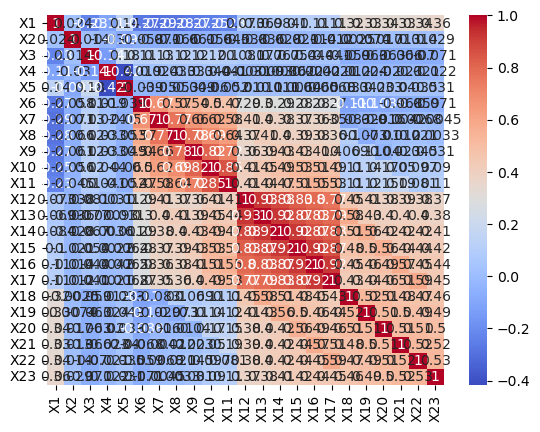

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


rf_param_grid = {
    'n_estimators': [int(x) for x in range (40,300, 10)],
    'max_depth': [int(x) for x in range (10,100,10)]
}
rf_classifier = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(rf_classifier,
                                 param_distributions = rf_param_grid,
                                 n_iter = 10,
                                 scoring='accuracy',
                                 cv=5,
                                 verbose=2,
                                 n_jobs=-1,
                                 random_state=42
                                 )
rf_randomsearch.fit(X_train,y_train)

gb_class = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gb_class.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GradientBoostingClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


# Accuracy of random forest and gradient boosting classifier
rf_val_pred = rf_randomsearch.best_estimator_.predict(X_val)
rf_accuracy  = accuracy_score(y_val, rf_val_pred)
rf_test_pred = rf_randomsearch.best_estimator_.predict(X_test)
rf_test_acc = accuracy_score(y_test,rf_test_pred)
print("RF test acc", rf_test_acc)
print("RF val acc", rf_accuracy )


gb_val_pred = gb_class.predict(X_val)
gb_accuracy = accuracy_score(y_val,gb_val_pred)
gb_test_pred = gb_class.predict(X_test)
gb_test_acc = accuracy_score(y_test,gb_test_pred)
print("GB test acc", gb_test_acc)
print("GB val acc", gb_accuracy)


RF test acc 0.8173012692050768
RF val acc 0.8199131306381557
GB test acc 0.821309285237141
GB val acc 0.8195790177079852


In [11]:
!pip install lime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd

lime_explainer = LimeTabularExplainer(X_train.values, mode = "classification",
                                      training_labels=y_train,
                                      feature_names=X.columns,
                                      categorical_features=[1],
                                      sample_around_instance=False,
                                      kernel_width=None
                                      )
sample_instance = 2
lime_explanation = lime_explainer.explain_instance(data_row = X_test.iloc[sample_instance].values,
                                                   predict_fn = rf_randomsearch.best_estimator_.predict_proba)
lime_explanation.show_in_notebook()

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install shap
import shap


# Shap explainer with graph of feature contribution to the output
shap_explainer = shap.KernelExplainer(rf_randomsearch.best_estimator_.predict_proba, shap.sample(X_train,300))
shap_values = shap_explainer(shap.sample(X_test,300))
delayed_values = shap_values[..., 1]

shap.plots.bar(delayed_values)

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
feature_importances = rf_randomsearch.best_estimator_.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

# Print feature importances
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
#SAME AS X2 BUT WITH DIFFRENT CONSTRAINT
sensitive_train = X_train['X2']
sensitive_test = X_test['X2']
threshold_optimizer = ThresholdOptimizer(
    estimator=model,
    objective="balanced_accuracy_score",
    constraints="equalized_odds",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [ ]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [ ]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

In [ ]:
import matplotlib.pyplot as plt
from fairlearn.postprocessing import ThresholdOptimizer

# Fit the model
model.fit(X_train, y_train)

# Fit the threshold optimizer
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

# Get feature importances after applying the threshold optimizer
optimized_feature_importances = threshold_optimizer.estimator_.feature_importances_

# Create a DataFrame for feature names and their importance scores
optimized_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': optimized_feature_importances})

# Sort the DataFrame by importance in descending order
optimized_feature_importance_df = optimized_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for optimized feature importance
plt.figure(figsize=(12, 6))
plt.bar(optimized_feature_importance_df['Feature'], optimized_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('threshold optimizer X2 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


##X2, reweighting: Accuracy: 0.6567249693555116

Statistical Parity Difference: 0.007498779913683404

Statistical Parity ratio: 0.940856798953208

Equalized Odds Difference: 0.02724396994859629

Equalized Odds Ratio: 0.8687067847882454


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sensitive_train= X_train["X2"]
sensitive_test= X_test["X2"]

# Calculate selection rate for each sensitive group
selection_rate_male = y_train[sensitive_train == 1].mean()
selection_rate_female = y_train[sensitive_train == 2].mean()

# Calculate inverse of selection rate
inverse_rate_male = 1 / selection_rate_male if selection_rate_male> 0 else 1
inverse_rate_female = 1 / selection_rate_female if selection_rate_female > 0 else 1

# Normalize the weights to make them sum to the number of samples (keeps the effective size of the dataset unchanged)
normalization_factor = (len(y_train) / (inverse_rate_male * (sensitive_train == 1).sum() + inverse_rate_female * (sensitive_train == 2).sum()))

# Create sample weights based on the sensitive feature
sample_weights = np.ones(len(y_train))
sample_weights[sensitive_train == 1] = inverse_rate_male * normalization_factor
sample_weights[sensitive_train == 2] = inverse_rate_female * normalization_factor

clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)
clf.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [ ]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Measure AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")

In [ ]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)

In [ ]:
# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

In [ ]:
import matplotlib.pyplot as plt
from fairlearn.postprocessing import ThresholdOptimizer




# Get feature importances after applying the threshold optimizer
optimized_feature_importances = clf.feature_importances_

# Create a DataFrame for feature names and their importance scores
optimized_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': optimized_feature_importances})

# Sort the DataFrame by importance in descending order
optimized_feature_importance_df = optimized_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for optimized feature importance
plt.figure(figsize=(12, 6))
plt.bar(optimized_feature_importance_df['Feature'], optimized_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('resampling  X2 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
